In [108]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

Automatically created module for IPython interactive environment
Feature ranking:
1. feature 9 (0.070643)
2. feature 3 (0.060250)
3. feature 6 (0.057904)
4. feature 19 (0.054016)
5. feature 0 (0.049957)
6. feature 21 (0.049160)
7. feature 14 (0.049040)
8. feature 4 (0.047459)
9. feature 18 (0.045806)
10. feature 16 (0.044746)
11. feature 2 (0.044376)
12. feature 1 (0.044187)
13. feature 8 (0.043333)
14. feature 10 (0.043079)
15. feature 17 (0.042420)
16. feature 20 (0.038273)
17. feature 11 (0.037720)
18. feature 5 (0.037692)
19. feature 12 (0.037122)
20. feature 15 (0.035325)
21. feature 7 (0.035153)
22. feature 13 (0.032340)


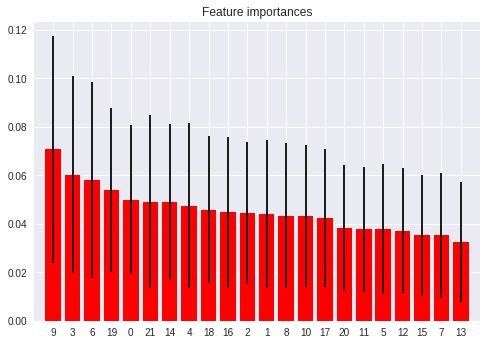

In [109]:
#ABORDAGEM USANDO RANDOM FOREST E REGRESSOES LINEARES PARA PREDIZER A POSICAO FINAL DE UM TIME NA TEMPORADA REGULAR
print(__doc__)

from sklearn.ensemble import ExtraTreesClassifier
df_14_15 = pd.read_csv('season_stats/2014-2015_season_stats.csv')
df_15_16 = pd.read_csv('season_stats/2015-2016_season_stats.csv')
df_16_17 = pd.read_csv('season_stats/2016-2017_season_stats.csv')

dfEast = df_14_15[:15]
dfEast2 = df_15_16[:15]
dfEast3 = df_16_17[:15]

dfWest = df_14_15[15:]
dfWest2 = df_15_16[15:]
dfWest3 = df_16_17[15:]

dfEastFinal = pd.concat([dfEast, dfEast2,dfEast3], ignore_index=True)
dfWestFinal = pd.concat([dfWest,dfWest2,dfWest3], ignore_index=True)
dfAll = pd.concat([dfWestFinal,dfEastFinal], ignore_index=True)
X=[]
y=[]
#mudar aqui o df para ajustar melhor o modelo à conferencia ou para todos
for r in dfAll.itertuples():
    aux=[]
    for i in range(4,26):
        aux.append(r[i])
    X.append(aux)
    if(r.POS<5):
        y.append('top playoff')
    elif(r.POS<9):
        y.append('bot playoff')
    elif(r.POS<12):
        y.append('almost playoff')
    else:
        y.append('worst teams')


# Build a forest and compute the feature importances
# Change parameter here to change number of forests
forest = ExtraTreesClassifier(n_estimators=1000,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(len(X[0])):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(len(X[0])), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(len(X[0])), indices)
plt.xlim([-1, len(X[0])])
plt.show()

# f=forest.predict([[240.0,41.6,86.8,0.479,10.0,25.4,0.395,31.6,61.4,0.514,15.2,19.6,0.774,9.0,33.4,42.4,23.3,8.0,4.6,14.3,18.5,108.4]])
# print(f)

#lembrar que a contagem abaixo começa em minutes played com esse sendo 0. Minutes played está sendo desconsiderado

#Mais importantes para o leste:
#50 trees ->(9,19,6,3,10,21)
#100 trees ->(9,3,19,6,21,10)
#200 trees ->(9,19,6,3,10,21)
#500 trees ->(9,19,3,6,10,21)
#1000 trees ->(9,19,3,10,6,21)

#Mais importantes para o oeste:
#50 trees ->(18,4,6,21,10,16)
#100 trees ->(18,3,6,9,4,14)
#200 trees ->(18,9,3,6,4,14)
#500 trees ->(18,9,3,6,16,19)
#1000 trees ->(18,9,3,6,16,4)

#Mais importantes Gerais:
#50 trees ->(9,6,3,21,19,2)
#100 trees ->(9,3,6,19,21,4)
#200 trees ->(9,6,3,19,4,21)
#500 trees ->(9,6,3,19,21,14)
#1000 trees ->(9,3,6,19,21,14)

#Os que basicamente aparecem como consenso sao 9(2P%), 3(FG%) e 6(3PT%)
#Outros como 19(TOV) e 21(PTS) também aparecem bastante

#Vale notar a diferença entre as conferências, já que na oeste o 18(BLk) aparece como unanimidade como mais importante
#enquanto para a leste ele não aparece nem no top 6. Para outros como 16(AST),14(DRB) e 4(3PT) isso também acontece.
#O mesmo se aplica quando se invertem as conferências.

In [110]:
#Com base nas features mais importantes dadas pelo random forest,
#resolvi criar um novo df que contem apenas as colunas importantes

#Lembrando que usarei as features mais importantes para cada conferencia no df da conferencia
#e as features mais importantes no geral para o df com todos os times, além do numero de 
#vitorias e derrotas e a posicao do time

#Lembrando que a contagem aqui é feita como MP sendo o 0, entao para fazer drop será necessario
#adicionar 3 aos indices

#Para o Leste, serão usadas as features:9(2P%),19(TOV),3(FG%),6(3P%),10(FT),21(PTS)
#Para o Oeste, serão usadas as features:18(BLK),9(2P%),3(FG%),6(3P%),16(AST),4(3P)
#Para todos, serão usadas as features:9(2P%),3(FG%),6(3PT%),19(TOV),21(PTS),4(3P)

#dfEastFinal

dfEastMinimum=dfEastFinal.iloc[:,[1,6,9,12,13,22,24,25,26,27]]
dfWestMinimum=dfWestFinal.iloc[:,[1,6,7,9,12,19,21,25,26,27]]
dfAllMinimum=dfAll.iloc[:,[1,6,7,9,12,22,24,25,26,27]]

dfAllMinimum

,Team,FG%,3P,3P%,2P%,TOV,PTS,WIN,LOSS,POS
0,Houston Rockets,0.444,11.4,0.348,0.506,16.7,103.9,56,26,2
1,Golden State Warriors,0.478,10.8,0.398,0.514,14.5,110.0,67,15,1
2,San Antonio Spurs,0.468,8.3,0.367,0.505,14.0,103.2,55,27,6
3,Minnesota Timberwolves,0.438,5.0,0.332,0.461,15.0,97.8,16,66,15
4,Denver Nuggets,0.433,8.0,0.325,0.476,14.2,101.5,30,52,12
5,Portland Trail Blazers,0.450,9.8,0.362,0.491,13.6,102.8,51,31,4
6,New Orleans Pelicans,0.457,7.1,0.370,0.484,13.3,99.4,45,37,8
7,Utah Jazz,0.447,7.4,0.343,0.486,15.3,95.1,38,44,11
8,Oklahoma City Thunder,0.447,7.7,0.339,0.486,14.7,104.0,45,37,9
9,Los Angeles Clippers,0.473,10.1,0.376,0.519,12.3,106.7,56,26,3


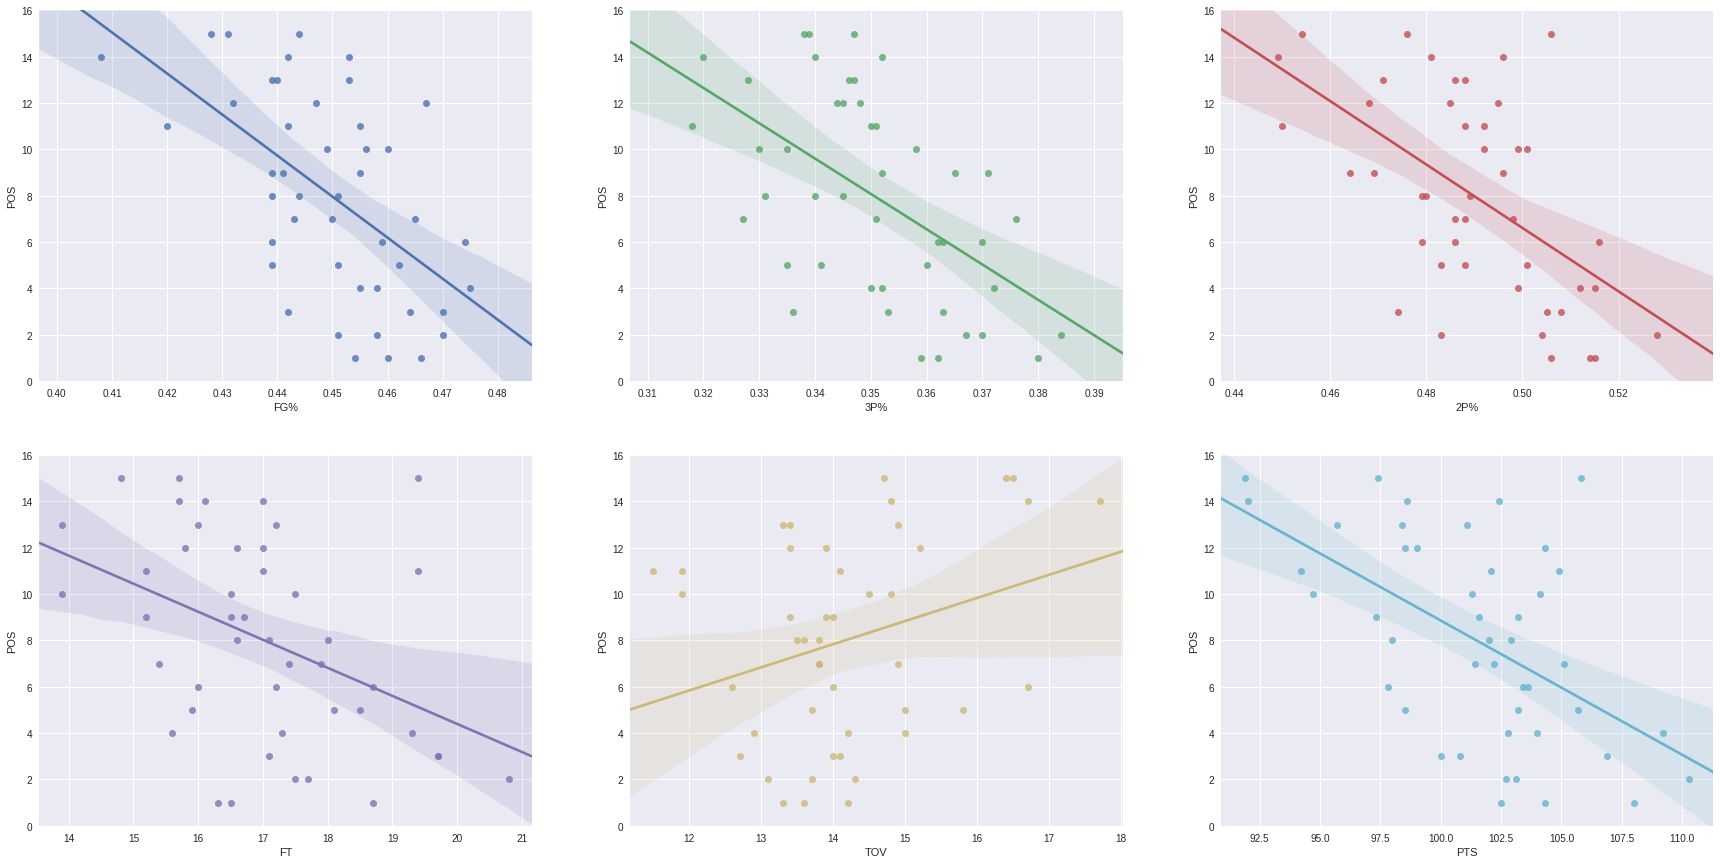

In [111]:
#Graficos e Modelos para a Conferencia Leste
f,graphics=plt.subplots(2,3, figsize=(30, 15))

gr1 = sns.regplot(x=(dfEastMinimum["FG%"]), y=dfEastMinimum["POS"],ax=graphics[0][0])
gr1.set(ylim=(0, 16))
gr2 = sns.regplot(x=(dfEastMinimum["3P%"]), y=dfEastMinimum["POS"],ax=graphics[0][1])
gr2.set(ylim=(0, 16))
gr3 = sns.regplot(x=(dfEastMinimum["2P%"]), y=dfEastMinimum["POS"],ax=graphics[0][2])
gr3.set(ylim=(0, 16))
gr4 = sns.regplot(x=(dfEastMinimum["FT"]),  y=dfEastMinimum["POS"],ax=graphics[1][0])
gr4.set(ylim=(0, 16))
gr5 = sns.regplot(x=(dfEastMinimum["TOV"]), y=dfEastMinimum["POS"],ax=graphics[1][1])
gr5.set(ylim=(0, 16))
gr6 = sns.regplot(x=(dfEastMinimum["PTS"]), y=dfEastMinimum["POS"],ax=graphics[1][2])
maxPTS = dfEastMinimum.loc[dfEastMinimum['PTS'].idxmax()].PTS
minPTS = dfEastMinimum.loc[dfEastMinimum['PTS'].idxmin()].PTS
gr6.set(ylim=(0, 16))
gr6.set(xlim=(minPTS-1, maxPTS+1))

gr1.set(xlabel='FG%')
gr2.set(xlabel='3P%')
gr3.set(xlabel='2P%')
gr4.set(xlabel='FT')
gr5.set(xlabel='TOV')
gr6.set(xlabel='PTS')
axes = [gr1,gr2,gr3,gr4,gr5,gr6]
plt.show(axes)

#Vale notar que todos os graficos são uma reta inclinada para baixo, menos a de turnovers.

In [112]:
dfEastMinimum.rename(columns={'FG%': 'PERCFG', '3P%': 'PERC3P','2P%': 'PERC2P'}, inplace=True)
model1 = smf.ols("POS ~ PERCFG + PERC3P + PERC2P + FT + TOV + PTS",data=dfEastMinimum)
result1 = model1.fit()

pd.concat([result1.params,result1.bse,result1.tvalues,result1.pvalues],
          axis=1, keys=['coef','SE','t','p-value'])

/home/bruno/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:2844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


,coef,SE,t,p-value
Intercept,82.994722,19.260482,4.309068,0.000112
PERCFG,-24.263762,86.515748,-0.280455,0.780650
PERC3P,-83.586795,46.684277,-1.790470,0.081348
PERC2P,-100.559688,76.533794,-1.313925,0.196749
FT,-0.868439,0.371082,-2.340287,0.024621
TOV,0.758703,0.425655,1.782437,0.082669
PTS,0.182433,0.243221,0.750070,0.457832


Nota-se que a posição final de um time da conferencia leste pode ser aproximadamente dada por:
    83-(24.2 * FG%)-(83.6 * 3P%)-(100.6 * 2P%)-(0.87 * FT)+(0.76 * TOV)+(0.18 * PTS)
    
Um fato notável é que nesse modelo a quantidade de pontos que um time faz interfere negativamente na posição final, o que é estranho, já que mais pontos normalmente indicam maior chance de vencer. Inclusice, em um dos gráficos acima, o de pontos x posiçao, podemos ver que a maioria dos times que tem pontuação acima da média (101.48) foi para os playoffs, isto é teve uma coloação boa.

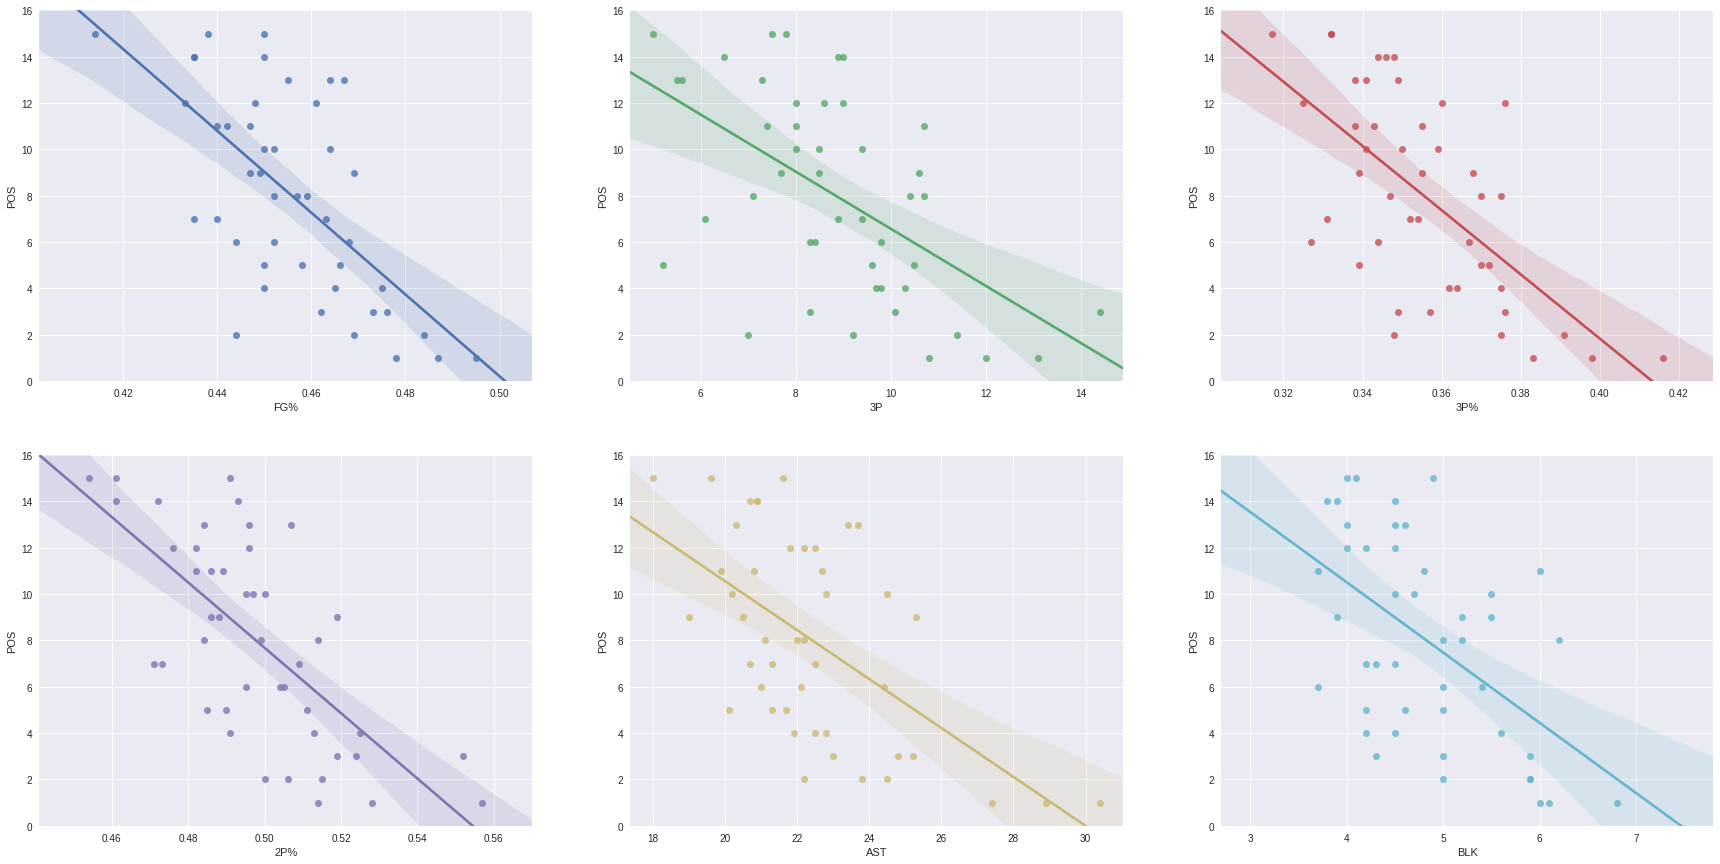

In [113]:
#Graficos e Modelos para a Conferencia Oeste
f,graphics=plt.subplots(2,3, figsize=(30, 15))

gr1 = sns.regplot(x=(dfWestMinimum["FG%"]), y=dfWestMinimum["POS"],ax=graphics[0][0])
gr1.set(ylim=(0, 16))
gr2 = sns.regplot(x=(dfWestMinimum["3P"]), y=dfWestMinimum["POS"],ax=graphics[0][1])
gr2.set(ylim=(0, 16))
gr3 = sns.regplot(x=(dfWestMinimum["3P%"]), y=dfWestMinimum["POS"],ax=graphics[0][2])
gr3.set(ylim=(0, 16))
gr4 = sns.regplot(x=(dfWestMinimum["2P%"]),  y=dfWestMinimum["POS"],ax=graphics[1][0])
gr4.set(ylim=(0, 16))
gr5 = sns.regplot(x=(dfWestMinimum["AST"]), y=dfWestMinimum["POS"],ax=graphics[1][1])
gr5.set(ylim=(0, 16))
gr6 = sns.regplot(x=(dfWestMinimum["BLK"]), y=dfWestMinimum["POS"],ax=graphics[1][2])
maxBLK = dfWestMinimum.loc[dfWestMinimum['BLK'].idxmax()].BLK
minBLK = dfWestMinimum.loc[dfWestMinimum['BLK'].idxmin()].BLK
gr6.set(ylim=(0, 16))
gr6.set(xlim=(minBLK-1, maxBLK+1))

gr1.set(xlabel='FG%')
gr2.set(xlabel='3P')
gr3.set(xlabel='3P%')
gr4.set(xlabel='2P%')
gr5.set(xlabel='AST')
gr6.set(xlabel='BLK')
axes = [gr1,gr2,gr3,gr4,gr5,gr6]
plt.show(axes)

In [114]:
dfWestMinimum.rename(columns={'FG%': 'PERCFG','3P':'MADE3P','3P%': 'PERC3P','2P%': 'PERC2P'}, inplace=True)
model2 = smf.ols("POS ~ PERCFG + MADE3P + PERC3P + PERC2P + AST + BLK",data=dfWestMinimum)
result2 = model2.fit()

pd.concat([result2.params,result2.bse,result2.tvalues,result2.pvalues],
          axis=1, keys=['coef','SE','t','p-value'])

/home/bruno/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:2844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


,coef,SE,t,p-value
Intercept,71.045862,16.317249,4.354034,0.000097
PERCFG,136.888531,258.306294,0.529947,0.599232
MADE3P,0.332564,1.281051,0.259602,0.796572
PERC3P,-112.314892,112.383096,-0.999393,0.323926
PERC2P,-164.805551,176.194161,-0.935363,0.355508
AST,0.022331,0.325269,0.068653,0.945625
BLK,-1.433607,0.692709,-2.069565,0.045342


Nota-se que a posição final de um time da conferencia oeste pode ser aproximadamente dada por:
    71+(136.9 * FG%)+(0.33 * 3P)-(112.3 * 3P%)-(164.8 * 2P%)+(0.02 * AST)-(1.43 * BLK)
    
Um fato a ser notado é o quão a porcentagem de FG influencia negativamente na posição final do time, enquanto a porcentagem de 3P e de 2P influenciam bastante positivamente.

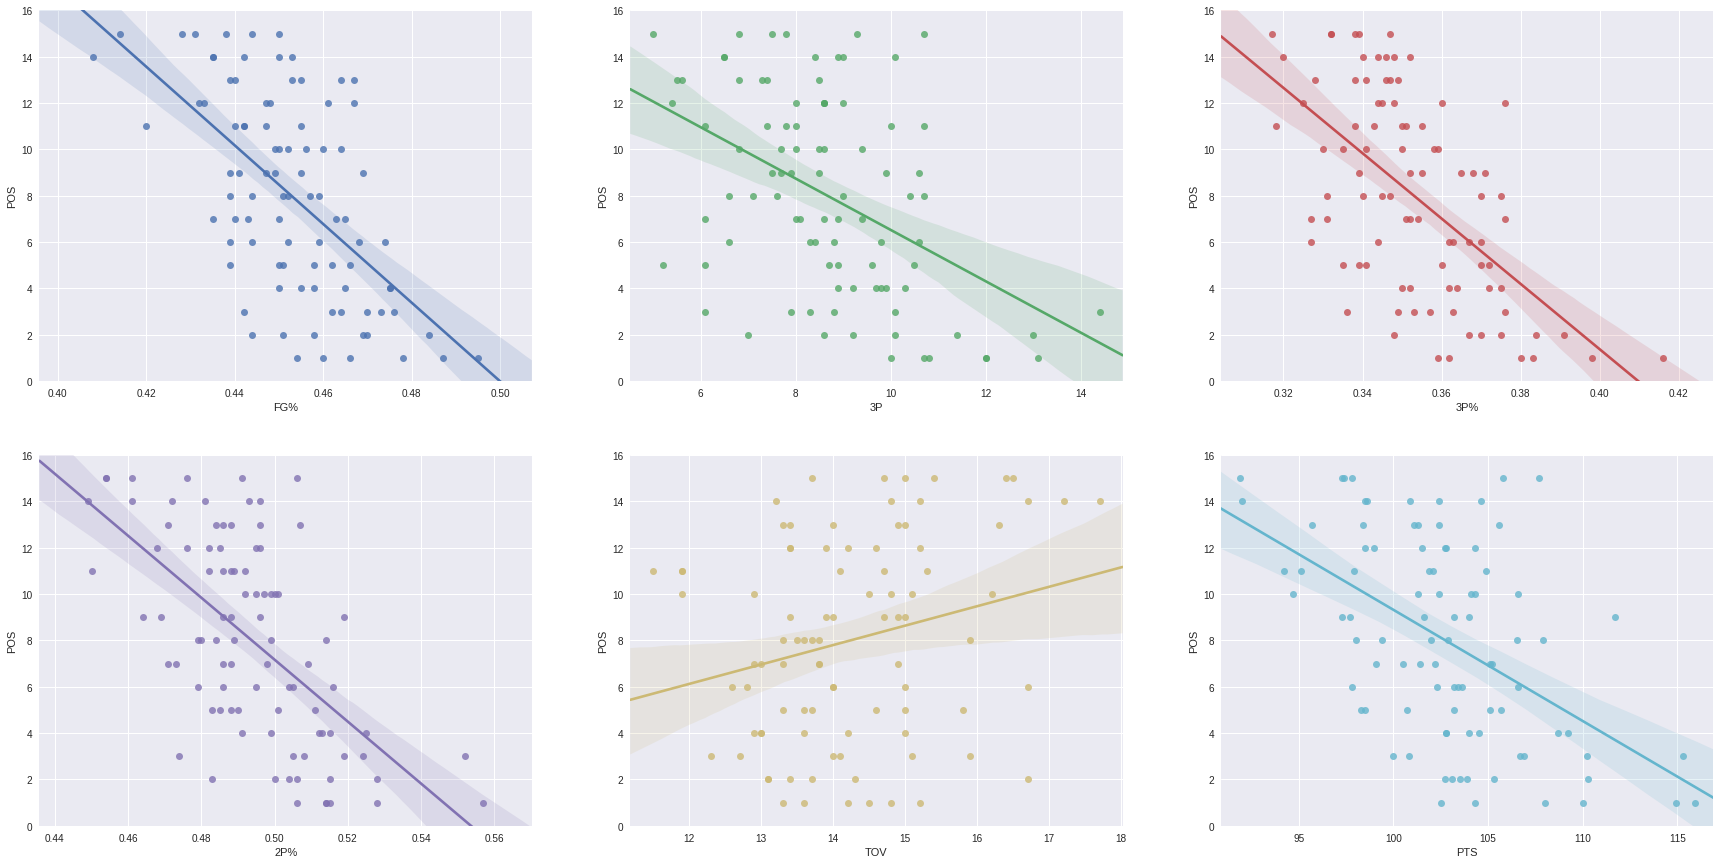

In [115]:
#Graficos e Modelos para as conferencias juntas
f,graphics=plt.subplots(2,3, figsize=(30, 15))

gr1 = sns.regplot(x=(dfAllMinimum["FG%"]), y=dfAllMinimum["POS"],ax=graphics[0][0])
gr1.set(ylim=(0, 16))
gr2 = sns.regplot(x=(dfAllMinimum["3P"]), y=dfAllMinimum["POS"],ax=graphics[0][1])
gr2.set(ylim=(0, 16))
gr3 = sns.regplot(x=(dfAllMinimum["3P%"]), y=dfAllMinimum["POS"],ax=graphics[0][2])
gr3.set(ylim=(0, 16))
gr4 = sns.regplot(x=(dfAllMinimum["2P%"]),  y=dfAllMinimum["POS"],ax=graphics[1][0])
gr4.set(ylim=(0, 16))
gr5 = sns.regplot(x=(dfAllMinimum["TOV"]), y=dfAllMinimum["POS"],ax=graphics[1][1])
gr5.set(ylim=(0, 16))
gr6 = sns.regplot(x=(dfAllMinimum["PTS"]), y=dfAllMinimum["POS"],ax=graphics[1][2])
maxPTS = dfAllMinimum.loc[dfAllMinimum['PTS'].idxmax()].PTS
minPTS = dfAllMinimum.loc[dfAllMinimum['PTS'].idxmin()].PTS
gr6.set(ylim=(0, 16))
gr6.set(xlim=(minPTS-1, maxPTS+1))

gr1.set(xlabel='FG%')
gr2.set(xlabel='3P')
gr3.set(xlabel='3P%')
gr4.set(xlabel='2P%')
gr5.set(xlabel='TOV')
gr6.set(xlabel='PTS')
axes = [gr1,gr2,gr3,gr4,gr5,gr6]
plt.show(axes)

In [116]:
dfAllMinimum.rename(columns={'FG%': 'PERCFG','3P':'MADE3P','3P%': 'PERC3P','2P%': 'PERC2P'}, inplace=True)
model3 = smf.ols("POS ~ PERCFG + MADE3P + PERC3P + PERC2P + TOV + PTS",data=dfAllMinimum)
result3 = model3.fit()

pd.concat([result3.params,result3.bse,result3.tvalues,result3.pvalues],
          axis=1, keys=['coef','SE','t','p-value'])

/home/bruno/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:2844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


,coef,SE,t,p-value
Intercept,68.398689,11.271670,6.068195,3.704891e-08
PERCFG,17.768114,242.256657,0.073344,9.417087e-01
MADE3P,-0.054479,1.240970,-0.043900,9.650895e-01
PERC3P,-81.348946,100.278323,-0.811232,4.195529e-01
PERC2P,-119.748777,163.782618,-0.731145,4.667499e-01
TOV,0.765728,0.272687,2.808086,6.211052e-03
PTS,0.087354,0.154354,0.565931,5.729674e-01


Nota-se que a posição final de um time sem levar em consideração a conferência pode ser aproximadamente dada por:
    68+(17.8 * FG%)-(0.05 * 3P)-(81.3 * 3P%)-(119.7 * 2P%)+(0.76 * TOV)+(0.09 * PTS)
    
Um fato a se notar é que tanto pontos quanto porcentagem de FG impactam negativamente na posição dos times

In [158]:
#Medindo quao precisos foram os modelos:

#Usando o conjunto de treino como conjunto de teste:
r1 = result1.predict(dfEastMinimum)
r2 = result2.predict(dfWestMinimum)
r3 = result3.predict(dfAllMinimum)

predctionR1=[]
predctionR2=[]
predctionR3=[]

for r in r1:
    predctionR1.append(int(r + 0.5))
for r in r2:
    predctionR2.append(int(r + 0.5))
for r in r3:
    predctionR3.append(int(r + 0.5))
    
t1=pd.DataFrame({'prediction':predctionR1})
t2=pd.DataFrame({'prediction':predctionR2})
t3=pd.DataFrame({'prediction':predctionR3})

dfEastMinimum = dfEastMinimum.assign(prediction=t1.values)
dfWestMinimum = dfWestMinimum.assign(prediction=t2.values)
dfAllMinimum = dfAllMinimum.assign(prediction=t3.values)

# avgDif = 0
# for r in dfEastMinimum.itertuples():
#     avgDif+=(abs(r.POS-r.prediction))
# avgDif/=len(dfEastMinimum)
# print(avgDif) #2.444

# avgDif = 0
# for r in dfWestMinimum.itertuples():
#     avgDif+=(abs(r.POS-r.prediction))
# avgDif/=len(dfEastMinimum)
# print(avgDif) # 2.1555

# avgDif = 0
# for r in dfAllMinimum.itertuples():
#     avgDif+=(abs(r.POS-r.prediction))
# avgDif/=len(dfAllMinimum)
# print(avgDif) #2.5666

#Erro médio usando o conjunto de treino como conjunto de teste => aprx 2 posicoes
#Conclui-se que para o caso conjunto de treino = conjunto de teste, ajustar um modelo para cada conferência se mostrou
#um pouco melhor, já que o erro médio é menor, no entanto a diferença não é tão considerável

#Usando como conunto de treino a temporada ainda em andamento (17/18):
df_17_18 = pd.read_csv('season_stats/2017-2018_season_stats.csv')
dfEast17_18 = df_17_18[:15]
dfWest17_18 = df_17_18[15:]

dfEast17_18Minimum=dfEast17_18.iloc[:,[0,1,6,9,12,13,22,24]]
dfWest17_18Minimum=dfWest17_18.iloc[:,[0,1,6,7,9,12,19,21]]
df_17_18Minimum=df_17_18.iloc[:,[0,1,6,7,9,12,22,24]]

dfEast17_18Minimum.rename(columns={'FG%': 'PERCFG', '3P%': 'PERC3P','2P%': 'PERC2P'}, inplace=True)
dfWest17_18Minimum.rename(columns={'FG%': 'PERCFG','3P':'MADE3P','3P%': 'PERC3P','2P%': 'PERC2P'}, inplace=True)
df_17_18Minimum.rename(columns={'FG%': 'PERCFG','3P':'MADE3P','3P%': 'PERC3P','2P%': 'PERC2P'}, inplace=True)


newr1 = result1.predict(dfEast17_18Minimum)
newr2 = result2.predict(dfWest17_18Minimum)
newr3 = result3.predict(df_17_18Minimum)

predctionNewR1=[]
predctionNewR2=[]
predctionNewR3=[]

for r in newr1:
    if(int(r + 0.5)<1):
        predctionNewR1.append(1)
    elif(int(r + 0.5)>15):
        predctionNewR1.append(15)
    else:
        predctionNewR1.append(int(r + 0.5))
for r in newr2:
    if(int(r + 0.5)<1):
        predctionNewR2.append(1)
    elif(int(r + 0.5)>15):
        predctionNewR2.append(15)
    else:
        predctionNewR2.append(int(r + 0.5))
for r in newr3:
    if(int(r + 0.5)<1):
        predctionNewR3.append(1)
    elif(int(r + 0.5)>15):
        predctionNewR3.append(15)
    else:
        predctionNewR3.append(int(r + 0.5))
        
newT1=pd.DataFrame({'prediction':predctionNewR1})
newT2=pd.DataFrame({'prediction':predctionNewR2})
newT3=pd.DataFrame({'prediction':predctionNewR3})

dfEast17_18Minimum = dfEast17_18Minimum.assign(prediction=newT1.values)
dfWest17_18Minimum = dfWest17_18Minimum.assign(prediction=newT2.values)
df_17_18Minimum = df_17_18Minimum.assign(prediction=newT3.values)

# avgDif = 0
# for r in dfEast17_18Minimum.itertuples():
#     avgDif+=(abs(((r[0]%15)+1)-r.prediction))
# avgDif/=len(dfEast17_18Minimum)
# print(avgDif) #3.2

# avgDif = 0
# for r in dfWest17_18Minimum.itertuples():
#     avgDif+=(abs(((r[0]%15)+1)-r.prediction))
# avgDif/=len(dfWest17_18Minimum)
# print(avgDif) #2.86

# avgDif = 0
# for r in df_17_18Minimum.itertuples():
#     avgDif+=(abs(((r[0]%15)+1)-r.prediction))
# avgDif/=len(df_17_18Minimum)
# print(avgDif) #2.86

#Erro médio usando como conjunto de teste a temporada 17/18 => aprx 3 posicoes
#Conclui-se que usando um novo conjunto para teste, o erro ficou um pouco maior e que o modelo para a conferencia leste 
#apresentou erro maior do que um modelo geral independente de conferencia. Um fato a se observar é que os modelos 
#para a conferencia oeste e o independente de conferencia apresentaram o mesmo erro médio.

2.86666666667


/home/bruno/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:2844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)
